In [2]:
import glob
import joblib
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:

# This method extract the necessary features from the destination folder
def data_reader_labels(loadPath, partitions, flare_label, binary=True):
    # Read files from the define path
    all_files = glob.glob(str(loadPath) + partitions + "/" + flare_label + "/*.csv")

    if flare_label == 'FL':
        # Iterate through the content in each file
        X_fl = []
        X_fl_label = []
        M_fl = []
        M_fl_label = []

        
        for filename in all_files:
            # Extract flare labels from the file name
            tag = filename.split('@')[0]
            tag = tag.split('/')[-1]
            LABEL = tag.split('_ar')[0]

            # Read the file and extract necessary features
            df = pd.read_csv(filename, index_col=None, header=0, sep='\t')
            df = df[['USFLUX', 'TOTUSJH', 'ABSNJZH', 'SAVNCPP', 'TOTBSQ',"TOTPOT",
                    "TOTUSJZ"]]
            
            row_lst = []
            for (index, row) in df.iterrows():
                row_lst.append(row.tolist())

            if LABEL.startswith('X'):
                X_fl.append(row_lst)
                X_fl_label.append(1)
            if LABEL.startswith('M'):
                M_fl.append(row_lst)
                M_fl_label.append(1)

        # Return the 3D array (a, b, c) corresponding to (num of total record, timestamps, dimension/parameters)
        return np.array(M_fl), np.array(M_fl_label), np.array(X_fl), np.array(X_fl_label)

    elif flare_label == 'NF':
        # Iterate through the content in each file
        C_nf = []
        C_nf_label = []
        B_nf = []
        B_nf_label = []
        FQ_nf = []
        FQ_nf_label = []

        
        for filename in all_files:
            # Extract flare labels from the file name
            tag = filename.split('@')[0]
            tag = tag.split('/')[-1]
            LABEL = tag.split('_ar')[0]

            # Read the file and extract necessary features
            df = pd.read_csv(filename, index_col=None, header=0, sep='\t')
            df = df[['USFLUX', 'TOTUSJH', 'ABSNJZH', 'SAVNCPP', 'TOTBSQ',"TOTPOT",
                    "TOTUSJZ"]]
           
            row_lst = []
            for (index, row) in df.iterrows():
                row_lst.append(row.tolist())

            if LABEL.startswith('C'):
                C_nf.append(row_lst)
                C_nf_label.append(0)
            if LABEL.startswith('B'):
                B_nf.append(row_lst)
                B_nf_label.append(0)
            if LABEL.startswith('FQ'):
                FQ_nf.append(row_lst)
                FQ_nf_label.append(0)

        # Return the 3D array (a, b, c) corresponding to (num of total record, timestamps, dimension/parameters)
        return np.array(B_nf), np.array(B_nf_label), np.array(C_nf), np.array(C_nf_label), np.array(FQ_nf), np.array(
            FQ_nf_label)

In [4]:
path="/data/SHARPS/BERKAY/v0.7/CLUS/"
M_FL_values,M_FL_target,X_FL_values,X_FL_target=data_reader_labels(path,"partition1","FL")
B_NF_values,B_NF_target,C_NF_values,C_NF_target,FQ_NF_values,FQ_NF_target=data_reader_labels(path,"partition1","NF")



In [5]:
M_FL_values.shape

(1089, 60, 7)

In [6]:
data_array=np.concatenate((M_FL_values,X_FL_values,B_NF_values,C_NF_values,FQ_NF_values))

In [7]:
data_array.shape

(9289, 60, 7)

In [8]:
target_array=np.concatenate((M_FL_target,X_FL_target,B_NF_target,C_NF_target,FQ_NF_target))

In [38]:
features=['USFLUX', 'TOTUSJH', 'ABSNJZH', 'SAVNCPP', 'TOTBSQ',"TOTPOT","TOTUSJZ"]
data_df=pd.DataFrame()
for k in range(0,data_array.shape[2]):
    all_values_list=[]
    for j in range(0,data_array.shape[0]):
        feature_list=data_array[j,:,k].tolist()
        all_values_list.append(feature_list)
    data_df[features[k]]=all_values_list
data_df["Flare_Target"]= target_array.tolist()
    

60

In [14]:
feature_list

1.685004162948243e+20

In [9]:
unique, counts = np.unique(target_array, return_counts=True)

print(np.asarray((unique, counts)).T)

[[   0 8035]
 [   1 1254]]


In [10]:
features=['USFLUX', 'TOTUSJH', 'ABSNJZH', 'SAVNCPP', 'TOTBSQ',"TOTPOT","TOTUSJZ"]
stat_ls = []
for i in range(0,data_array.shape[0]):
    df = pd.DataFrame(data_array[i,:,:], columns =features)
    summary_df_cont=pd.DataFrame()
    for names in features:
        temp_df=pd.DataFrame()
        temp_df["Feature"]=[names]
        temp_df["Null_Values"]=[df[names].isnull().sum()]
        temp_df["Min"]=[df[names].min()]
        temp_df["Max"]=[df[names].max()]
        temp_df["Mean"]=[df[names].mean()]
        temp_df["Std.Dev"]=[df[names].std()]
        summary_df_cont=pd.concat([summary_df_cont,temp_df])
    row_lst=[]
    for (index, row) in summary_df_cont.iterrows():
        row_lst.append(row[1:].tolist())
    
    stat_ls.append(row_lst)

stat_array=np.array(stat_ls)
    
    

In [36]:
null_count_ls=[]
min_ls=[]
max_ls=[]
avg_ls=[]
std_ls=[]
std_std_ls=[]
for i in range(0,len(features)):
    null_count_ls.append(sum(stat_array[:,i,0]))
    min_ls.append(min(stat_array[:,i,1]))
    max_ls.append(max(stat_array[:,i,2]))
    avg_ls.append(np.mean(stat_array[:,i,3]))
    std_ls.append(np.mean(stat_array[:,i,4]))
    std_std_ls.append(np.std(stat_array[:,i,4]))

In [37]:
Summary_stat_df=pd.DataFrame()
Summary_stat_df["Feature"]=features
Summary_stat_df["Null_Values_Count"]=null_count_ls
Summary_stat_df["Min_Value"]=min_ls
Summary_stat_df["Max_Value"]=max_ls
Summary_stat_df["Mean_Value"]=avg_ls
Summary_stat_df["Avg_Std_dev"]=std_ls
Summary_stat_df["Std_Std_dev"]=std_std_ls

In [38]:
Summary_stat_df

Feature  Null_Values_Count  Min_Value     Max_Value    Mean_Value  \
0   USFLUX             1071.0        0.0  8.775930e+22  9.821387e+21   
1  TOTUSJH             1071.0        0.0  6.030828e+03  6.978924e+02   
2  ABSNJZH             1071.0        0.0  2.316500e+03  9.866510e+01   
3  SAVNCPP             1071.0        0.0  9.254607e+13  4.245085e+12   
4   TOTBSQ             1071.0        0.0  1.026628e+11  9.561597e+09   
5   TOTPOT             1071.0        0.0  2.820689e+25  1.556261e+23   
6  TOTUSJZ             1071.0        0.0  1.521560e+14  1.379820e+13   

    Avg_Std_dev   Std_Std_dev  
0  4.620271e+20  5.952752e+20  
1  3.593588e+01  5.025827e+01  
2  1.511177e+01  2.551137e+01  
3  7.843084e+11  1.077923e+12  
4  3.713793e+08  5.907339e+08  
5  6.994500e+21  6.861156e+22  
6  8.263475e+11  1.075089e+12

In [16]:
data_ls = []
for i in range(0,data_array.shape[0]):
    df = pd.DataFrame(data_array[i,:,:], columns =features)
    ##Filling Null values using linear interpolation
    
    df.interpolate(method='linear', axis=0, limit_direction='both', inplace=True)
    
    ##Normalization using standard scaler
    #scaler = MinMaxScaler(feature_range=(0, 1))
    #df = pd.DataFrame(scaler.fit_transform(df))
    row_lst=[]
    for (index, row) in df.iterrows():
        row_lst.append(row.tolist())
    
    data_ls.append(row_lst)
    
final_array_data=np.array(data_ls)  
    
    

In [17]:
final_array_data.shape

(9289, 60, 7)

In [18]:
stat_array.shape

(9289, 7, 5)

In [19]:
mean_ls=[]
std_ls=[]
for i in range(0,stat_array.shape[1]):
    mean_ls.append(stat_array[:,i,3])
    std_ls.append(stat_array[:,i,4])
    

In [20]:
mean_df=pd.DataFrame()
for i in range(0,stat_array.shape[1]):
    mean_df[features[i]]=mean_ls[i]
mean_df["Flare_Target"]  = target_array

In [21]:
std_df=pd.DataFrame()
for i in range(0,stat_array.shape[1]):
    std_df[features[i]]=std_ls[i]
std_df["Flare_Target"]  = target_array

/usr/lib/anaconda/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/lib/anaconda/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


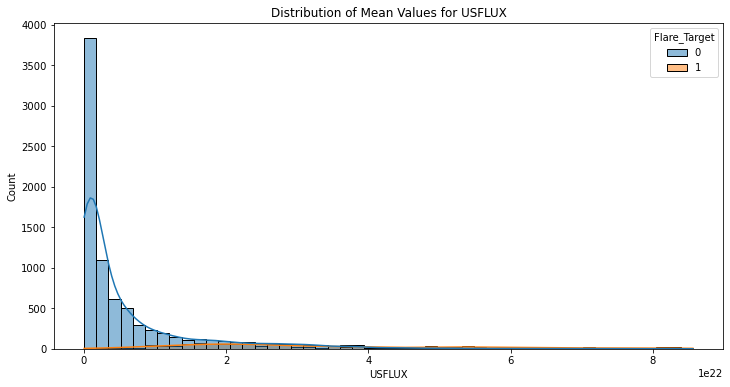

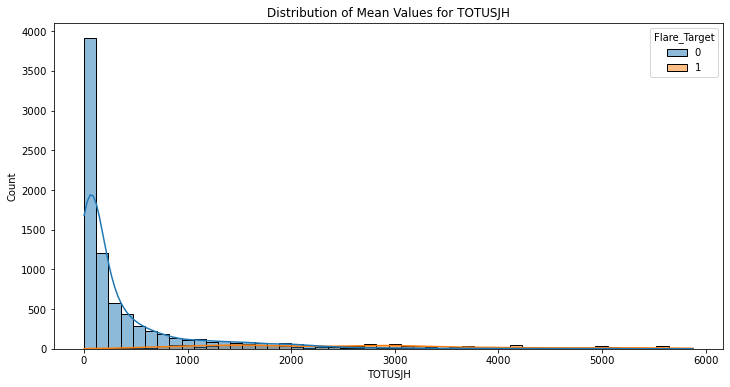

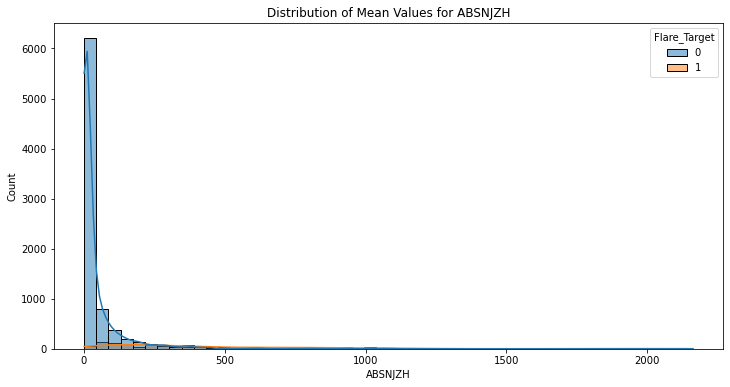

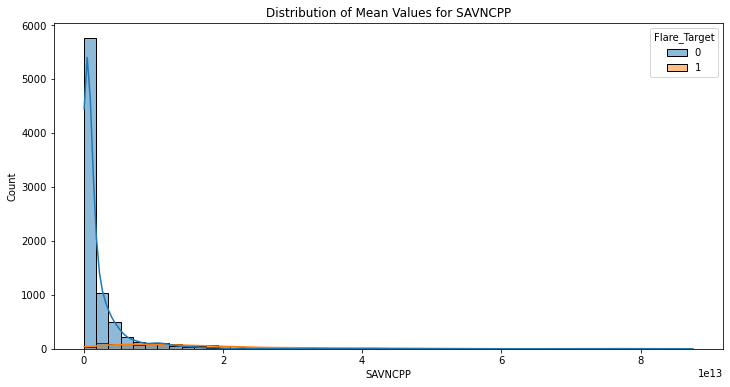

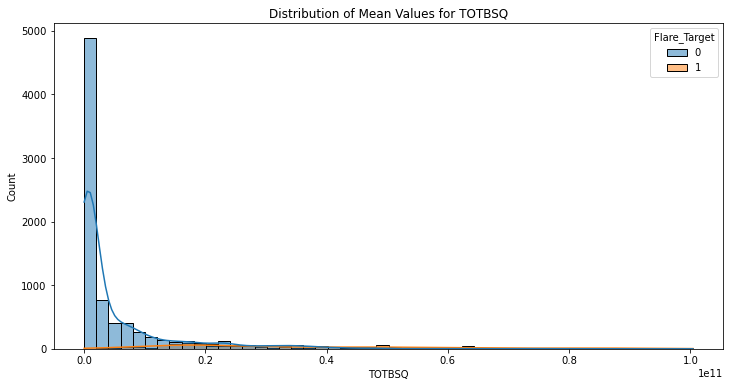

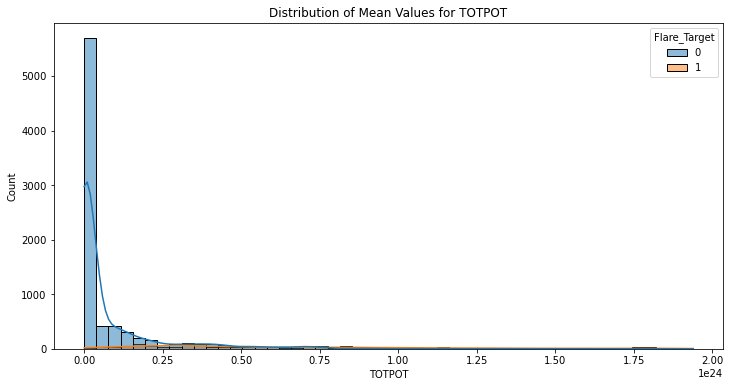

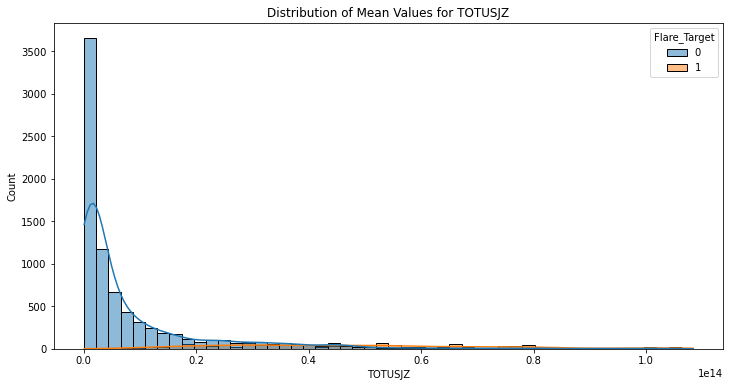

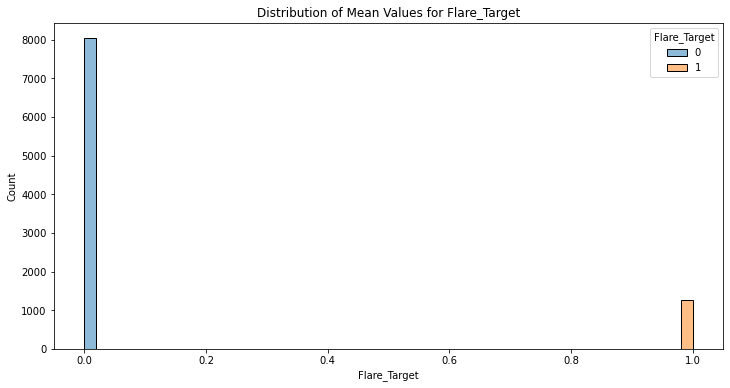

In [32]:
for name in mean_df.columns:
    fig, ax = plt.subplots(1,1,figsize=(12,6))
    sns.histplot(data=mean_df, x=name, 
                 kde=True,bins=50,hue="Flare_Target").set_title("Distribution of Mean Values for"+ " " + name)

/usr/lib/anaconda/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/lib/anaconda/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


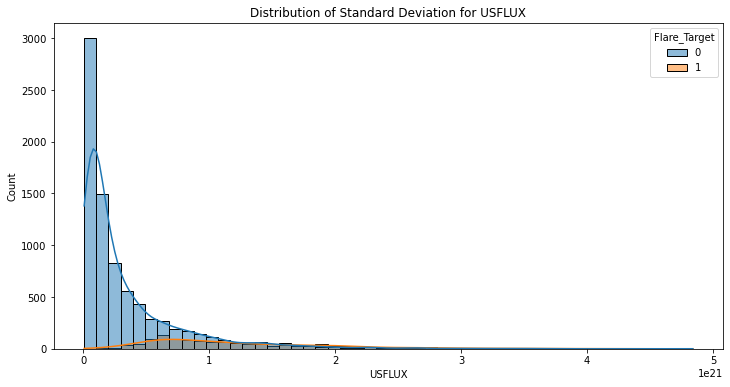

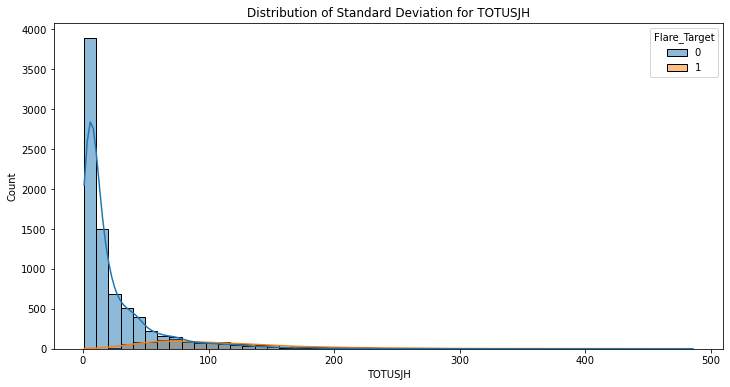

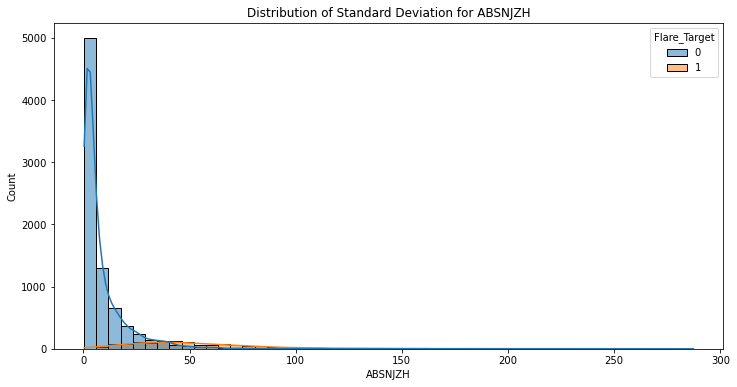

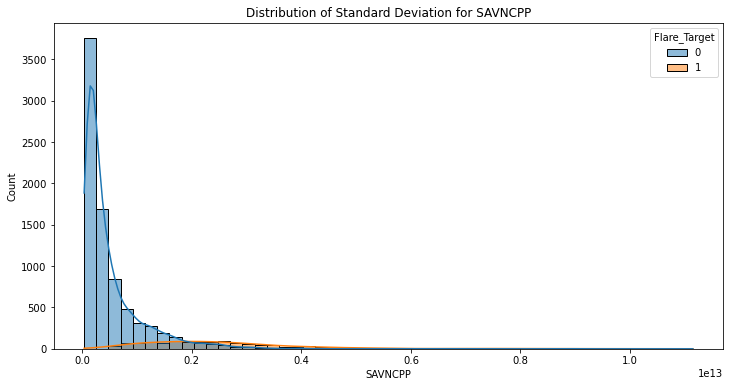

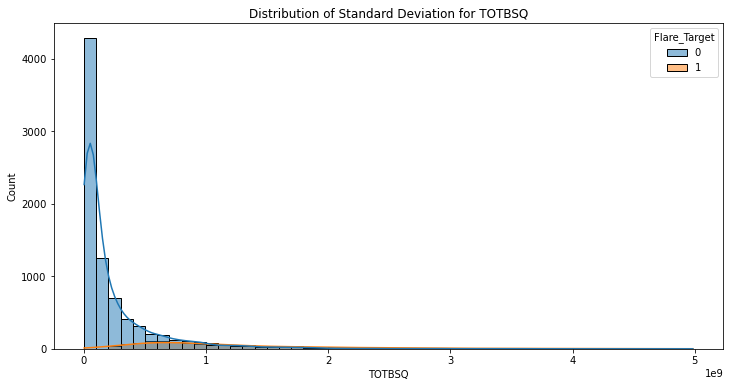

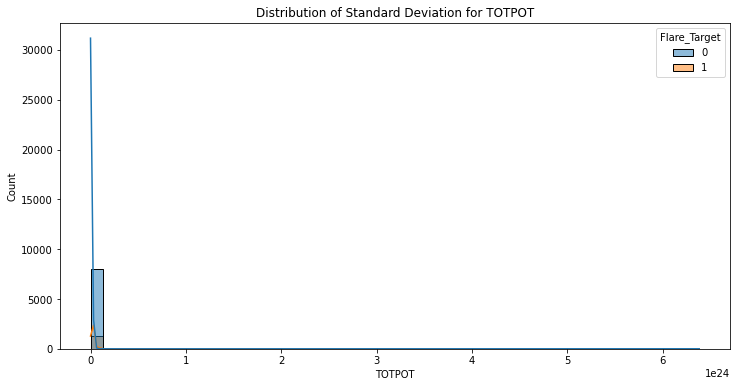

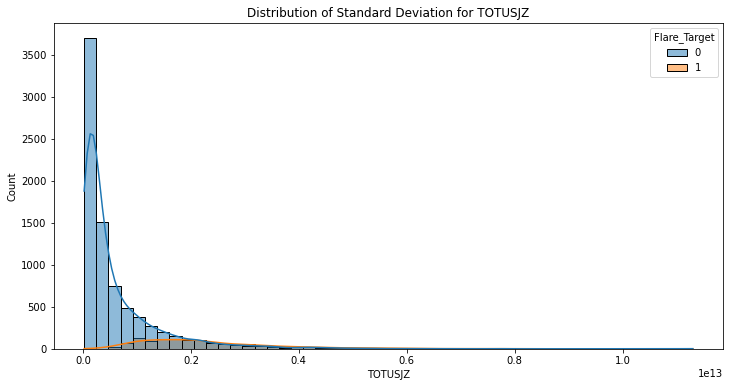

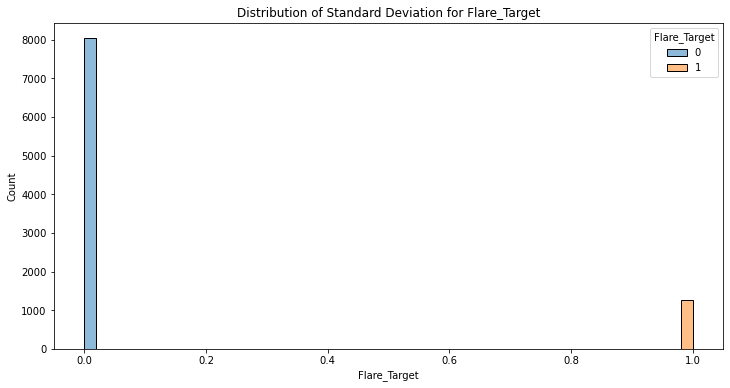

In [33]:
for name in std_df.columns:
    fig, ax = plt.subplots(1,1,figsize=(12,6))
    sns.histplot(data=std_df, x=name, 
                 kde=True,bins=50,hue="Flare_Target").set_title("Distribution of Standard Deviation for"+ " " + name)